# Task
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Use the data to complete the following tasks:

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
1. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
2. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
3. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
4. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [95]:
import pandas as pd
import numpy as np
df=pd.read_csv('fcc-forum-pageviews.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


#### 1. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [96]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) &  (df['value'] <= df['value'].quantile(0.975))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 10 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1238 non-null   object
 1   value   1238 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.0+ KB


#### 2. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
### heres is how it should look like
<img src="./asse/Figure_1 ps.png" width="1000" alt="Select Ollama models" />


In [97]:
df['date']=pd.to_datetime(df['date'])

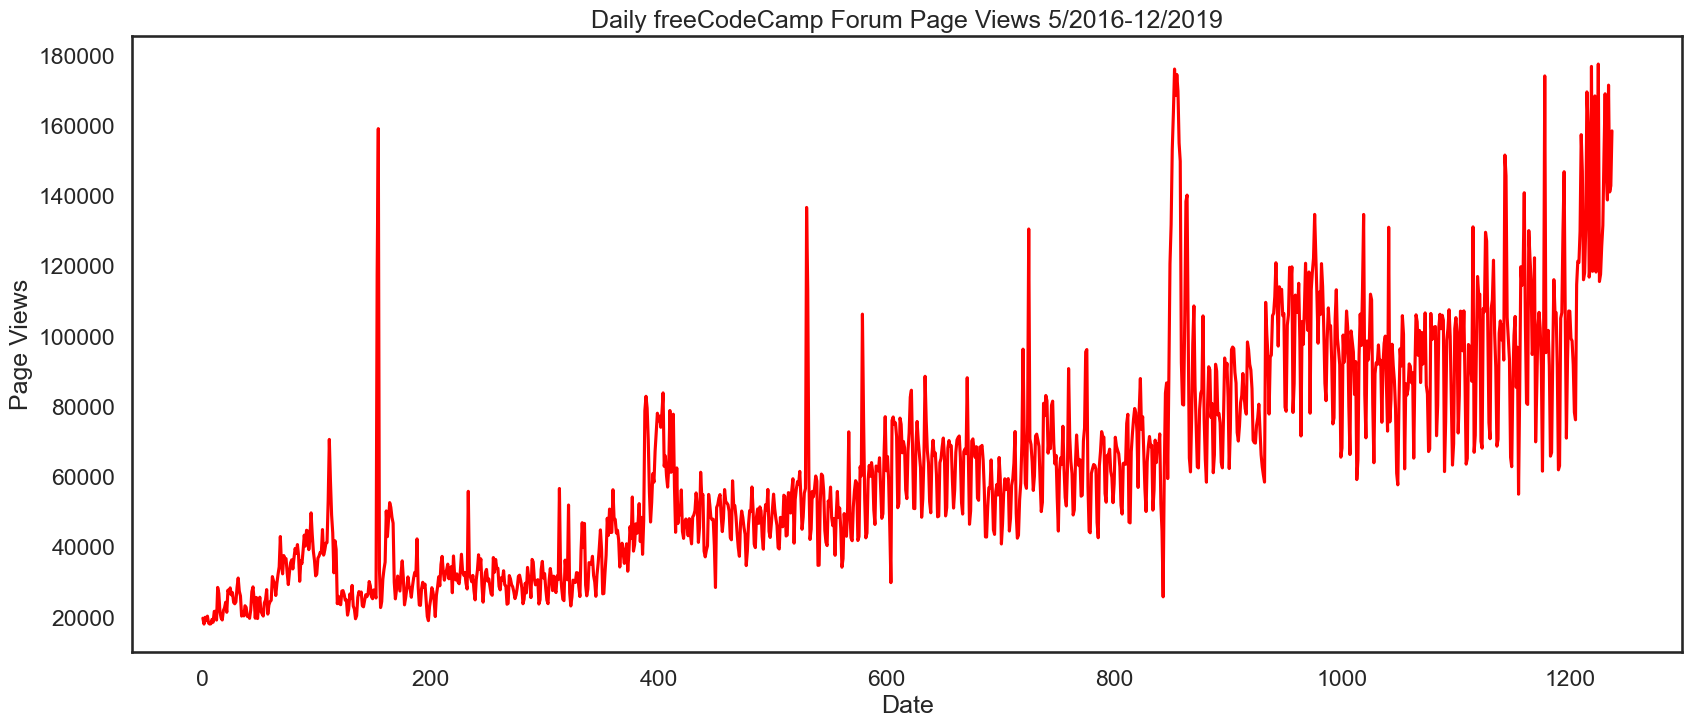

In [111]:
plt.figure(figsize=(20,8))
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.plot(df.index,df['value'],color='red')


#### 3. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
### heres is how it should look like
<img src="./asse/Figure_2 ps.png" width="1000" alt="Select Ollama models" />

In [99]:
df=df.reset_index()


In [100]:
#df.resample('M').sum()
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year
df.head()
#df_months=df.groupby(df['month']).mean()


,index,date,value,month,year
0,10,2016-05-19,19736,5,2016
1,17,2016-05-26,18060,5,2016
2,18,2016-05-27,19997,5,2016
3,19,2016-05-28,19044,5,2016
4,20,2016-05-29,20325,5,2016


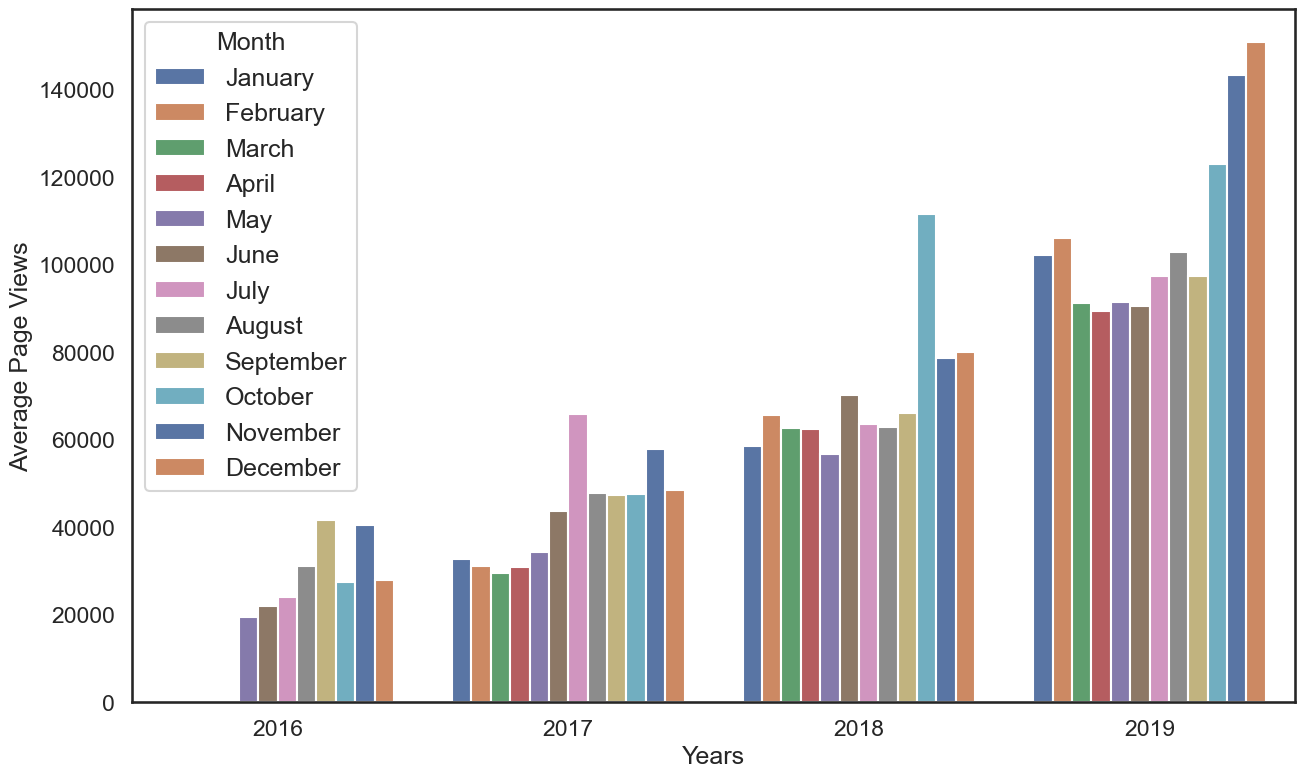

In [101]:
import seaborn as sns
plt.figure(figsize=(15,9))
g=sns.barplot(x='year',y='value',hue='month',data=df,ci=None,palette="deep")
#sns.histplot(x='year',y='value',hue='month',data=df)
#g.set_axis_labels('Years','Average Page Views')
g.set_ylabel('Average Page Views')
g.set_xlabel('Years')
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],title='Month',fontsize='medium',loc='upper left')


#### 4. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
For each chart, make sure to use a copy of the data frame.
### heres is how it should look like
<img src="./asse/Figure_3 ps.png" width="1000" alt="Select Ollama models" />

In [107]:
df_box = df.copy()

df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['year']=df_box['date'].dt.year

Text(0.5, 1.0, 'Month-Wise Box Plot(seasonality)')

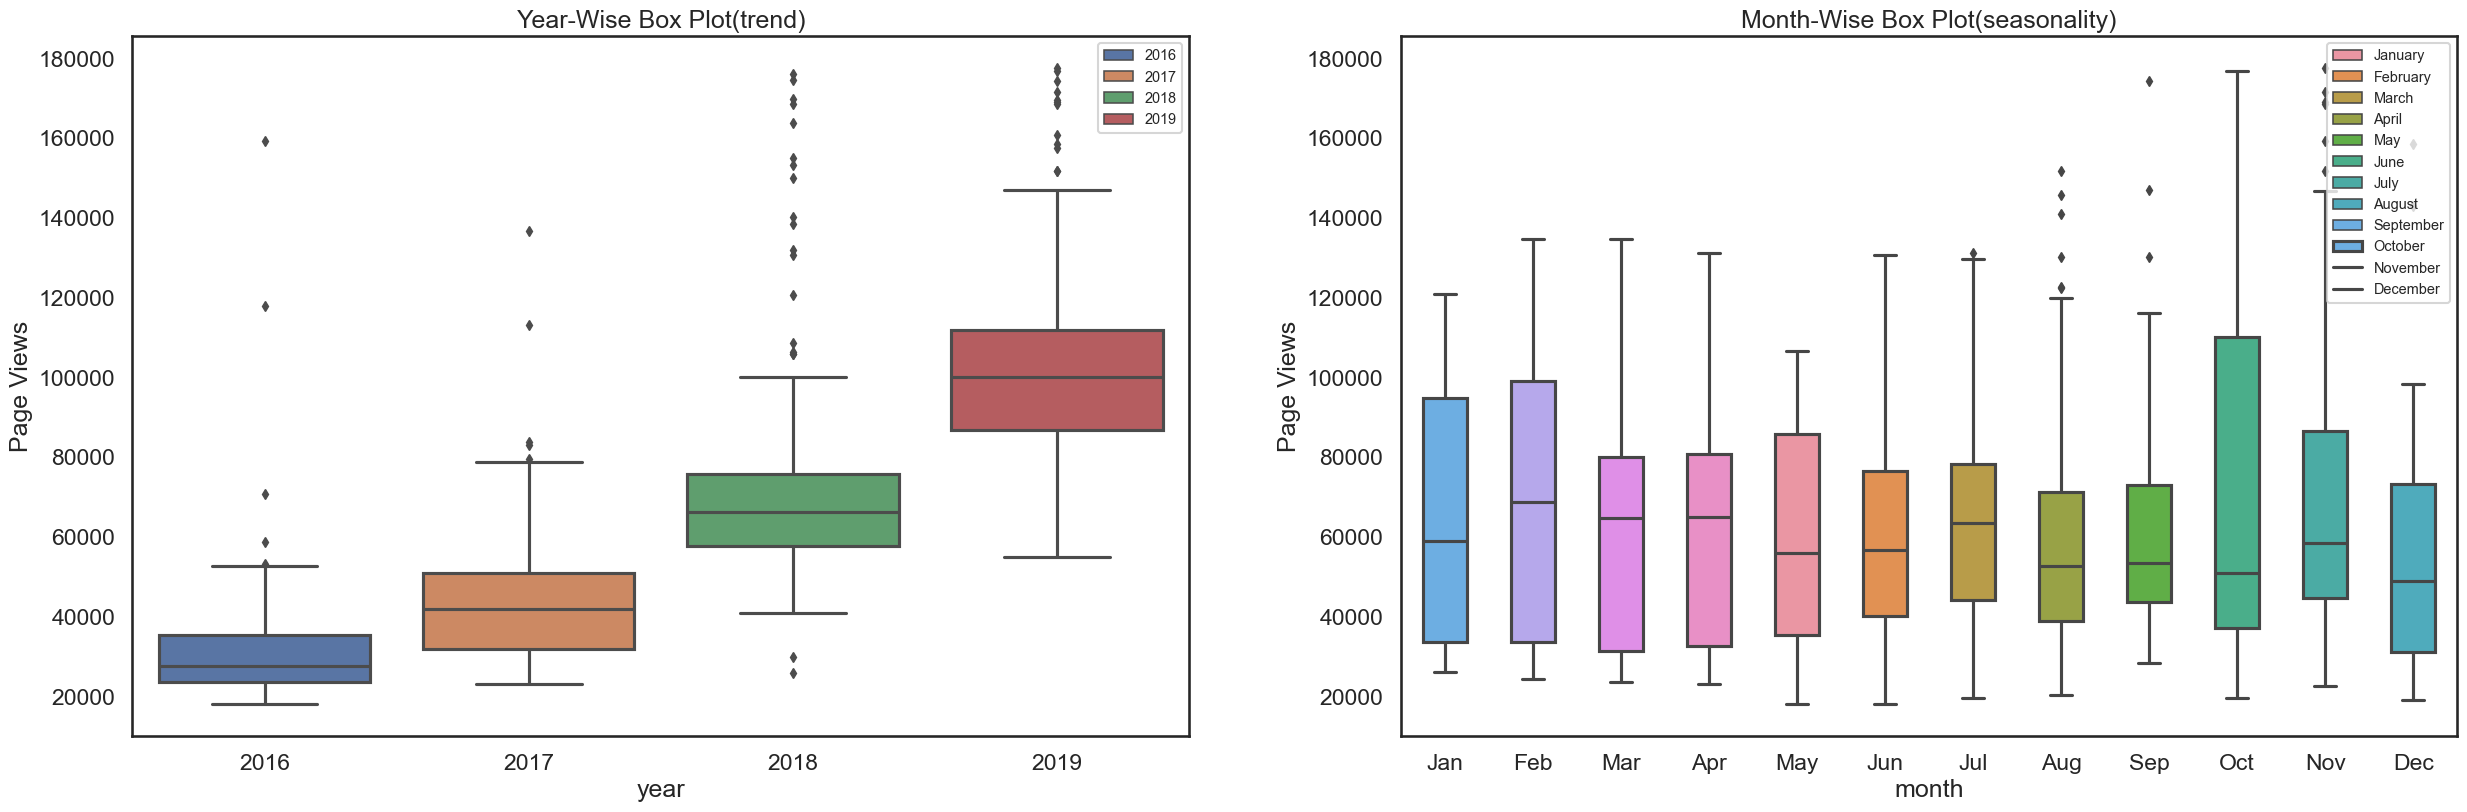

In [114]:
 # Draw box plots (using Seaborn)
plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
sns.boxplot(x="year", y="value", hue="year", data=df_box,dodge=False)
plt.ylabel('Page Views')
plt.title('Year-Wise Box Plot(trend)')

plt.legend(fontsize='xx-small',loc='best')
plt.subplot(2,2,2)
sns.boxplot(x="month", y="value", hue="month",width=0.5, data=df_box,order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],dodge=False)
plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'],fontsize='xx-small',loc='best')
plt.ylabel('Page Views')
plt.title('Month-Wise Box Plot(seasonality)')